### **Problem Description**
Please modify the learning algorithm code in the class and report the bias and variance.

In [ ]:
import numpy as np
from scipy import stats
def gen_sindata(n=2):
    x = stats.uniform(-1,2) # define random variable
    v = x.rvs((n,1)) # generate sample
    y = np.sin(np.pi*v) # use sample for sine
    return (v,y)

In [ ]:
# modify output function to compute bias and variation
from sklearn.linear_model import LinearRegression
import typing
def output()->typing.Tuple[float,float]:
  lr = LinearRegression(fit_intercept=False)
  cnt = 100000
  a_out=[] # output container
  for i in range(cnt):
      X, y = gen_sindata(2)
      lr.fit(X,y)
      y_pred = lr.predict(xi.reshape(-1,1))
      a_out.append(lr.coef_[0,0])
  a_bar = np.mean(a_out) # approx 1.43
  a_var = np.var(a_out) # approx 0.71


  bias = 0
  var = 0 
  x = np.random.uniform(-1, 2, size = cnt)
  for i in range(cnt):
      bias += (a_bar*x[i] - np.sin(np.pi*x[i]))**2
      var += a_var * x[i] * x[i]
  bias = bias / cnt # approx 2.84
  var = var / cnt # approx 0.71 
  return (bias,var,a_out)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=False)
X, y = gen_sindata(2)
lr.fit(X,y)
lr.coef_

array([[0.85549575]])

Text(0.5, 1.0, '$a=0.855$')

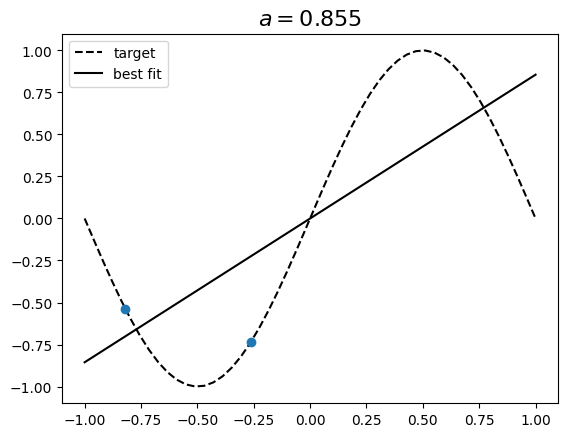

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
xi= np.linspace(-1,1,50)
yi= np.sin(np.pi*xi)
y_pred = lr.predict(xi.reshape(-1,1))

plt.plot(xi, yi,'--k',label='target')
plt.plot(X, y, 'o')
plt.plot(xi, y_pred, c='k', label='best fit')
plt.legend(loc='best')
plt.title('$a=%3.3g$'%(lr.coef_),fontsize=16)

In [ ]:
cnt = 100000
a_out=[] # output container
for i in range(cnt):
    X, y = gen_sindata(2)
    lr.fit(X,y)
    y_pred = lr.predict(xi.reshape(-1,1))
    a_out.append(lr.coef_[0,0])
a_bar = np.mean(a_out) # approx 1.43
a_var = np.var(a_out) # approx 0.71

In [ ]:
print (a_bar, a_var)

1.4212985374717326 0.7026883723349641


In [ ]:
# confirm the variance
vsum = 0
for i in range(cnt):
    vsum += (a_out[i] - a_bar) ** 2
a_var2 = vsum / cnt
print (a_var2)

0.7026883723349623


Text(0.5, 1.0, '$a_{bar}=1.42$, $a_{var}=0.703$')

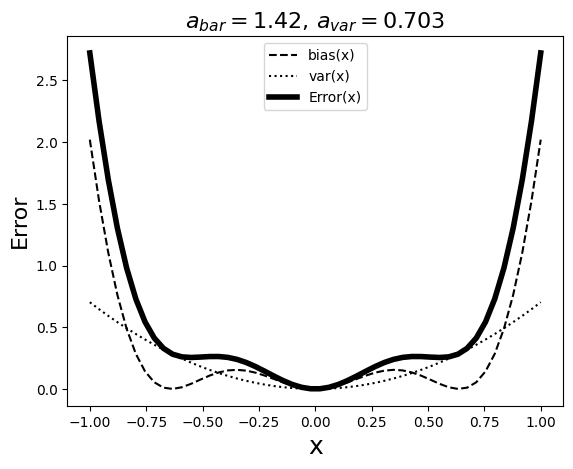

In [ ]:
xi= np.linspace(-1,1,50)
yi= np.sin(np.pi*xi)

plt.plot(xi,(a_bar*xi-yi)**2,'--k',label='bias(x)')
plt.plot(xi,(a_var)*(xi)**2,':k',label='var(x)')
plt.plot(xi,((a_bar*xi-yi)**2 + a_var*(xi)**2),'-k',lw = 4, label='Error(x)')
plt.legend(loc='best')
plt.xlabel('x', fontsize=18)
plt.ylabel('Error',fontsize=16)
plt.title('$a_{bar}=%3.3g$, $a_{var}=%3.3g$'%(a_bar,a_var),fontsize=16)

In [ ]:
# compute bias and variance
cnt = 100000
bias = 0
var = 0
x = np.random.uniform(-1, 2, size = cnt)
for i in range(cnt):
    bias += (a_bar*x[i] - np.sin(np.pi*x[i]))**2
    var += a_var * x[i] * x[i]
bias = bias / cnt # approx 2.84
var = var / cnt # approx 0.71
print(bias, var)

2.816095151597474 0.7024895260959967
